# Uczenie Maszynowe - Wykład 2


## Krótkie przypomnienie z poprzedniego wykładu

Celem sztucznej inteligencji jest stworzenie bytu, który rozumuje jak człowiek.

Choć w wielu zadaniach te algorytmy już przewyższają ludzkie zdolności, mają one trudności z uogólnianiem zadań, gdyż są szkolone do wykonywania tylko jednej, specyficznej rzeczy. Jednak stajemy się coraz lepsi w ich rozwijaniu.
Definicja uczenia maszynowego

Uczenie maszynowe to model uczący się na podstawie doświadczenia E, aby wykonać zadanie T, oceniając swoją wydajność za pomocą miary P.

## Proces rozwoju modelu

Cały proces tworzenia rozwiązań opartych na uczeniu maszynowym jest złożony i obejmuje wiele kroków.
<img src='img/flow.jpg' width=550/>

## Typy algorytmów ML

<img src='img/typesofml.jpg' />

### Uczenie nadzorowane

Definicja: Uczenie się na podstawie danych oznaczonych, gdzie są dostarczone pary wejście-wyjście.
Cel: Przewidywanie wartości wyjściowych dla nowych danych.
Rodzaje:

    Regresja: Przewidywanie ciągłych wyników.
    Przykład: Przewidywanie cen domów.

    Klasyfikacja: Przewidywanie wyników kategorycznych.
    Przykład: Wykrywanie spamu w e-mailach.

### Uczenie nienadzorowane

Definicja: Uczenie się z danych nieoznaczonych, znajdowanie wzorców lub struktury w danych.
Cel: Grupowanie punktów danych, redukcja wymiarów danych lub odkrywanie powiązań.
Rodzaje:

    Klasteryzacja: Grupowanie podobnych punktów danych.
    Przykład: Segmentacja klientów.

    Asocjacja: Znajdowanie reguł opisujących duże części danych.
    Przykład: Analiza koszyka zakupowego.

    Redukcja wymiarów: Ograniczenie liczby zmiennych opisujących dane do minimum.
    Przykład: Wybór zmiennych najważniejszych do przewidywania, kto kupi określone produkty w sklepie.

# Wprowadzenie do regresji liniowej

### Czym jest regresja liniowa?
Regresja liniowa to metoda statystyczna służąca do modelowania zależności między jedną zmienną zależną (y) a jedną lub większą liczbą zmiennych niezależnych (x). Celem jest przewidywanie wartości zmiennej zależnej na podstawie wartości zmiennych niezależnych.

### Przykłady zastosowań:
- **Przewidywanie cen domów**: Na podstawie cech takich jak powierzchnia, liczba pokoi, lokalizacja.
- **Analiza popytu**: Prognozowanie sprzedaży w oparciu o trendy rynkowe.
- **Badania naukowe**: Analiza zależności między różnymi zmiennymi w badaniach eksperymentalnych.

### Cel regresji liniowej:
Regresja liniowa pozwala na:
- Modelowanie zależności między zmiennymi,
- Przewidywanie wartości zmiennej zależnej,
- Określanie, w jakim stopniu zmienne niezależne wpływają na wynik.

---


# Teoretyczne podstawy regresji liniowej

### Równanie prostej regresji:
Regresja liniowa opisuje relację między zmienną zależną (y) a zmienną niezależną (x) za pomocą równania:

$$
y = \beta_0 + \beta_1 x
$$

Gdzie:
- **y** – zmienna zależna (wartość, którą chcemy przewidzieć),
- **x** – zmienna niezależna (cecha),
- **β₀** – wyraz wolny (przecięcie z osią y),
- **β₁** – współczynnik nachylenia (opisuje zmianę wartości y przy zmianie x).

### Parametry modelu:
- **β₀ (intercept)**: wartość y, gdy x = 0.
- **β₁ (nachylenie)**: określa, o ile zmieni się y przy jednostkowej zmianie x.

### Założenia regresji liniowej:
1. **Liniowość** – relacja między zmienną zależną a niezależnymi musi być liniowa.
2. **Niezależność** – obserwacje muszą być niezależne od siebie.
3. **Homoskedastyczność** – wariancja reszt powinna być stała dla wszystkich wartości x.
4. **Brak wielokolinearności** – brak silnej zależności między zmiennymi niezależnymi (dotyczy regresji wielokrotnej).

---


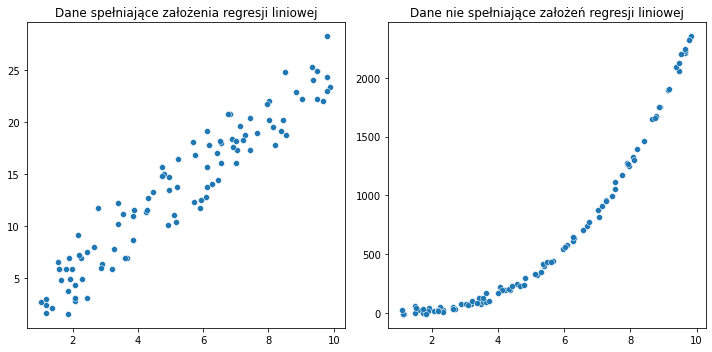

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Zbiór danych spełniający założenia regresji liniowej
np.random.seed(0)
x_good = np.random.uniform(1, 10, 100)
y_good = 2.5 * x_good + np.random.normal(0, 2, 100)

# Zbiór danych nie spełniający założeń regresji liniowej (nieliniowość)
x_bad = np.random.uniform(1, 10, 100)
y_bad = 2.5 * x_bad**3 + np.random.normal(4, 22, 100)

# Tworzenie figurek
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Dane spełniające założenia regresji liniowej
sns.scatterplot(x=x_good, y=y_good, ax=axs[0])
axs[0].set_title("Dane spełniające założenia regresji liniowej")

# Dane nie spełniające założeń regresji liniowej (nieliniowość)
sns.scatterplot(x=x_bad, y=y_bad, ax=axs[1])
axs[1].set_title("Dane nie spełniające założeń regresji liniowej")

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Enable interactive mode
%matplotlib notebook

# Generating data with adjustable homoskedasticity
np.random.seed(0)
x = np.random.uniform(1, 10, 1000)
y_good = 2.5 * x + np.random.normal(0, 2, 1000)

# Function to generate data with different levels of heteroskedasticity
def generate_data(heteroskedasticity_factor):
    y_bad = 2.5 * x + np.random.normal(0, heteroskedasticity_factor * x, 1000)
    return y_bad

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)
line, = plt.plot(x, y_good, 'o', label='Good data (Homoskedasticity)')
plt.title("Homoskedastyczność")

# Add a slider for adjusting the heteroskedasticity
ax_hetero = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
hetero_slider = Slider(ax_hetero, 'Heteroskedastyczność', 0.1, 1.0, valinit=1.0)

# Update function for the slider
def update(val):
    line.set_ydata(generate_data(hetero_slider.val))
    fig.canvas.draw_idle()

# Call the update function when the slider value changes
hetero_slider.on_changed(update)

# Display the plot
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Równanie prostej regresji:
Regresja liniowa opisuje relację między zmienną zależną (y) a zmienną niezależną (x) za pomocą równania:

$$
y = \beta_0 + \beta_1 x
$$

Gdzie:
- **y** – zmienna zależna (wartość, którą chcemy przewidzieć),
- **x** – zmienna niezależna (cecha),
- **β₀** – wyraz wolny (przecięcie z osią y),
- **β₁** – współczynnik nachylenia (opisuje zmianę wartości y przy zmianie x).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.linear_model import LinearRegression

# Enable interactive mode
%matplotlib notebook

# Generating initial data
np.random.seed(0)
x_full = np.random.uniform(1, 10, 100)
y_full = 2.5 * x_full + np.random.normal(0, 2, 100)

# Linear regression model
def fit_regression(x, y):
    model = LinearRegression()
    x_reshaped = x.reshape(-1, 1)  # Reshaping for sklearn
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    return y_pred, model.coef_[0], model.intercept_

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)

# Plot the initial subset of points and regression line
line_data, = plt.plot(x_full, y_full, 'o', label='Data points')
y_pred, slope, intercept = fit_regression(x_full, y_full)
line_regression, = plt.plot(x_full, y_pred, label='Regression Line')

# Display the regression equation
text_eq = ax.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', 
                  transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.title("Interactive Linear Regression")
plt.xlabel("x")
plt.ylabel("y")

# Add a slider for adjusting the number of data points
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
points_slider = Slider(ax_slider, 'Number of Points', 2, 100, valinit=2, valstep=1)

# Update function for the slider
def update(val):
    num_points = int(points_slider.val)
    x_subset = x_full[:num_points]
    y_subset = y_full[:num_points]
    
    # Update data points and regression line
    line_data.set_data(x_subset, y_subset)
    y_pred, slope, intercept = fit_regression(x_subset, y_subset)
    line_regression.set_data(x_subset, y_pred)
    
    # Update the displayed regression equation
    text_eq.set_text(f'y = {slope:.2f}x + {intercept:.2f}')
    
    ax.relim()
#     ax.autoscale_view()
    fig.canvas.draw_idle()

# Call the update function when the slider value changes
points_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# Algorytm regresji liniowej

### Metoda najmniejszych kwadratów:
Regresja liniowa używa **metody najmniejszych kwadratów** do optymalizacji prostej regresji. Celem jest zminimalizowanie sumy kwadratów różnic między rzeczywistymi a przewidywanymi wartościami.

### Kroki algorytmu:
1. **Obliczenie błędu**: Różnica między rzeczywistą wartością y a przewidywaną wartością y_hat.

   $$
   \text{błąd} = y - \hat{y}
   $$

2. **Kwadrat błędu**: Błąd podniesiony do kwadratu:
    
    $$
   \text{kwadrat błędu} = (y - \hat{y})^2
   $$

3. **Zminimalizowanie sumy kwadratów błędów**: Algorytm szuka współczynników regresji $\beta_0$, $\beta_1$) minimalizujących sumę kwadratów błędów.

   $$
   \text{SSE} = \sum (y - \hat{y})^2
   $$

### Interpretacja współczynników:

- **$\beta_1$**: Określa zmianę wartości y przy jednostkowej zmianie x.
- **$\beta_0$**: Wartość y, gdy x = 0.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Enable interactive mode
%matplotlib notebook

# Generate synthetic data for linear regression
np.random.seed(0)
x = np.random.uniform(1, 10, 100)
y = 2.5 * x + np.random.normal(0, 2, 100)

# Initialize parameters
alpha = 0.01  # Learning rate
iterations = 100
m, b = 0, 0  # Initial slope and intercept

# Linear regression function for predicting y
def predict(x, m, b):
    return m * x + b

# Gradient descent to optimize m and b
def gradient_descent(x, y, m, b, learning_rate, num_iterations):
    N = len(y)
    for i in range(num_iterations):
        y_pred = predict(x, m, b)
        m_gradient = -(2/N) * np.sum(x * (y - y_pred))
        b_gradient = -(2/N) * np.sum(y - y_pred)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
        sse = np.sum((y - y_pred) ** 2)  # Calculate SSE (sum of squared errors)
        if i % 1 == 0:  # Plot every 50 iterations for smoother animation
            yield m, b, sse

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)
scat = plt.scatter(x, y, label='Data points')
line, = plt.plot(x, predict(x, m, b), label='Regression Line', color='red')
plt.title("Interactive Linear Regression with Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")

# Display the sum of squared errors (SSE) in the plot
text_sse = ax.text(0.05, 0.95, f'SSE: {np.sum((y - predict(x, m, b)) ** 2):.2f}', 
                   transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Add a slider for adjusting the number of iterations
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
iter_slider = Slider(ax_slider, 'Iterations', 1, 100, valinit=1, valstep=1)

# Update function to show regression optimization and update SSE
def update(val):
    num_iterations = int(iter_slider.val)
    for m_opt, b_opt, sse_opt in gradient_descent(x, y, m, b, alpha, num_iterations):
        line.set_ydata(predict(x, m_opt, b_opt))
        text_sse.set_text(f'SSE: {sse_opt:.2f}')
#         ax.relim()
#         ax.autoscale_view()
        fig.canvas.draw_idle()

# Call the update function when the slider value changes
iter_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# Przykład liczbowy regresji liniowej: Predykcja cen domów

### Dane:

Rozważmy prosty przykład, gdzie chcemy przewidzieć ceny domów na podstawie ich powierzchni. Mamy następujące dane:

| Powierzchnia (m²) | Cena (tys. zł) |
|-------------------|----------------|
| 50                | 150            |
| 60                | 180            |
| 80                | 200            |
| 100               | 220            |
| 120               | 260            |



In [5]:
# Importowanie potrzebnych bibliotek
import numpy as np
from sklearn.linear_model import LinearRegression

# Dane (powierzchnia w metrach kwadratowych oraz ceny domów w tysiącach zł)
x = np.array([50, 60, 80, 100, 120, 140]).reshape(-1, 1)  # Składanie danych x w kolumnę
y = np.array([150, 180, 200, 220, 260, 300])

In [6]:
%matplotlib inline
plt.scatter(x,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Tworzenie modelu regresji liniowej
model = LinearRegression()


In [8]:
# Dopasowanie modelu do danych
model.fit(x, y)

LinearRegression()

In [9]:
# Współczynnik nachylenia (beta_1) i wyraz wolny (beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

In [10]:
# Funkcja do przewidywania cen dla nowych wartości powierzchni
def predict(x_val):
    return model.predict(np.array(x_val).reshape(-1, 1))

In [11]:
# Przewidywanie cen dla podanych wartości x
y_pred = predict(x)

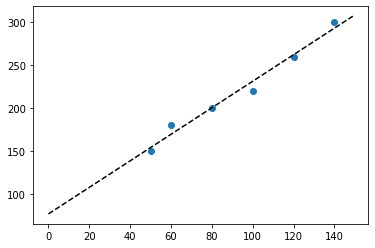

In [12]:
plt.scatter(x,y)
plt.plot(np.arange(0,150),[beta_1*z + beta_0 for z in np.arange(0,150)],
        c='k',ls='--')

array([153.83561644, 169.31506849, 200.2739726 , 231.23287671,
       262.19178082, 293.15068493])

# Ocena jakości modelu regresji

### Współczynnik determinacji (R²)
- **R²** mierzy, jaka część wariancji zmiennej zależnej jest wyjaśniona przez model.
- Zakres wartości: od 0 do 1.
- Wzór:
  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$
  gdzie $y_i$ to rzeczywista wartość, $\hat{y}_i$ to przewidywana wartość, a $ \bar{y} $ to średnia wartość rzeczywistych danych.

- **Interpretacja:**
  - R² = 1: Model idealnie dopasowany.
  - R² = 0: Model nie wyjaśnia żadnej zmienności danych.
  
### Średni błąd bezwzględny (MAE)
- **MAE** mierzy średnią różnicę między przewidywanymi a rzeczywistymi wartościami.
- Wzór:
  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
- **Interpretacja:**
  - Im mniejsza wartość MAE, tym lepsza jakość modelu. MAE mówi o przeciętnym błędzie modelu w jednostkach danych.

### Średni błąd kwadratowy (MSE)
- **MSE** mierzy średnią kwadratową różnicę między rzeczywistymi a przewidywanymi wartościami.
- Wzór:
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- **Interpretacja:**
  - MSE jest wrażliwe na duże błędy, ponieważ podnosi błędy do kwadratu, co wzmacnia ich wagę.
  
### Pierwiastek ze średniego błędu kwadratowego (RMSE)
- **RMSE** to pierwiastek kwadratowy z MSE. Jest bardziej interpretowalny, ponieważ przywraca jednostki danych.
- Wzór:
  $$
  RMSE = \sqrt{MSE}
  $$
- **Interpretacja:**
  - Im niższe RMSE, tym lepiej model przewiduje rzeczywiste dane.

---


# Optymalizacja regresji za pomocą gradientu stochastycznego

### Czym jest gradient stochastyczny?
Gradient stochastyczny to metoda optymalizacji używana w uczeniu maszynowym do minimalizacji funkcji kosztu. W przypadku regresji liniowej celem jest minimalizacja błędu predykcji, czyli różnicy między przewidywaną a rzeczywistą wartością.

### Funkcja kosztu
Dla regresji liniowej używamy funkcji kosztu zwanej **średnim błędem kwadratowym (MSE)**:
$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Gdzie $y_i$ to rzeczywista wartość, a $\hat{y}_i$ to przewidywana wartość.

### Aktualizacja parametrów
Gradient stochastyczny optymalizuje model, aktualizując parametry regresji (współczynniki) w każdym kroku:
$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$
Gdzie:
- $theta_j$ to współczynniki modelu (nachylenie i wyraz wolny),
- $\alpha$ to **współczynnik uczenia** (learning rate),
- $\frac{\partial}{\partial \theta_j} J(\theta)$ to pochodna funkcji kosztu (gradient).

### Stochastic Gradient Descent (SGD)
W klasycznym **Gradient Descent** używamy całego zbioru danych, aby obliczyć gradient. W **Stochastic Gradient Descent (SGD)**, obliczamy gradient dla jednej losowej próbki na raz, co sprawia, że optymalizacja jest szybsza i bardziej efektywna w przypadku dużych zbiorów danych.

#### Kroki algorytmu SGD:
1. **Inicjalizacja** parametrów $\theta_0$ i $\theta_1$ (np. losowe wartości).
2. **Iteracyjnie aktualizujemy** parametry dla każdej próbki \(i\):
   - Obliczamy gradient dla próbki:
   $$
   \nabla_{\theta_j} J(\theta) = -2x_i(y_i - \hat{y}_i)
   $$
   - Aktualizujemy parametry modelu:
   $$
   \theta_j := \theta_j - \alpha \nabla_{\theta_j} J(\theta)
   $$
3. **Powtarzamy** aż parametry osiągną optymalne wartości.

### Zalety Gradientu Stochastycznego:
- **Szybka optymalizacja**: Przetwarza próbki na bieżąco, co pozwala szybciej dotrzeć do dobrego rozwiązania.
- **Efektywność przy dużych zbiorach danych**: Lepiej sprawdza się w sytuacjach, gdzie zbiór danych jest duży i nie można przeprowadzać pełnych aktualizacji dla całego zbioru.

### Wizualizacja optymalizacji
Gradient stochastyczny porusza się po przestrzeni parametrów, dążąc do minimalizacji funkcji kosztu. Parametry regresji są stopniowo dostosowywane, aż funkcja kosztu osiągnie minimum.

---


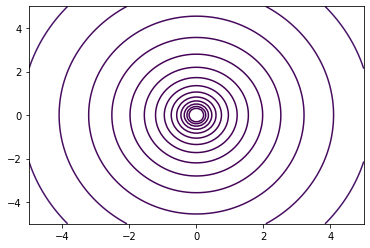

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Define the function (a simple quadratic bowl for this example)
def f(x, y):
    return 2*x**2 + y**2

# Gradient of the function
def grad_f(x, y):
    return np.array([4*x, 2*y])

# Stochastic Gradient Descent (SGD) with adjustable learning rate and iterations
def sgd(starting_point, learning_rate, iterations):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    current_point = np.array(starting_point)
    
    for i in range(iterations):
        gradient = grad_f(current_point[0], current_point[1])
        current_point = current_point - learning_rate * gradient
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

# Create a grid for the contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

# Starting point and parameters for SGD
start_point = np.array([4, 4])
learning_rate = 0.1

# This function will update the plot for the animation
def update(iteration):
    ax.clear()
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    iterations = iteration + 1
    x_vals, y_vals = sgd(start_point, learning_rate, iterations)
    ax.plot(x_vals, y_vals, marker='o', color='red')
    ax.set_title(f"SGD Iteration: {iterations}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=50, interval=200)

# Show the plot
plt.show()


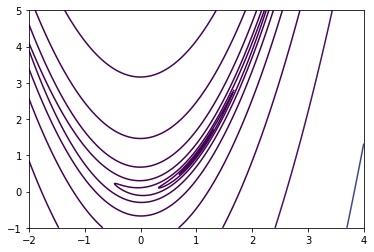

In [14]:
# Define a more complex cost function (Rosenbrock function)
def f_complex(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of the more complex cost function
def grad_f_complex(x, y):
    grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
    grad_y = 200 * (y - x**2)
    return np.array([grad_x, grad_y])

# Stochastic Gradient Descent (SGD) with the more complex cost function
def sgd_complex(starting_point, learning_rate, iterations):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    current_point = np.array(starting_point)
    
    for i in range(iterations):
        gradient = grad_f_complex(current_point[0], current_point[1])
        current_point = current_point - learning_rate * gradient
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

# Create a grid for the contour plot of the more complex function
x = np.linspace(-2, 4, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f_complex(X, Y)

# Set up the figure and axis for the more complex cost function
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(-1, 5, 10), cmap='viridis')

# This function will update the plot for the more complex function animation
def update_complex(iteration):
    ax.clear()
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    iterations = iteration + 1
    x_vals, y_vals = sgd_complex(start_point, learning_rate, iterations)
    ax.plot(x_vals, y_vals, marker='o', color='red')
    ax.set_title(f"SGD Iteration: {iterations} (Complex Function)")

# Create the animation for the more complex function
ani_complex = animation.FuncAnimation(fig, update_complex, frames=20, interval=200)

# Show the plot
plt.show()


# Porównanie Gradientu Stochastycznego z Równaniem Normalnym

### Gradient Stochastyczny (SGD)
Gradient Stochastyczny to algorytm optymalizacyjny, który iteracyjnie aktualizuje parametry modelu, minimalizując funkcję kosztu. Jest to metoda numeryczna stosowana do regresji liniowej, szczególnie przy dużych zbiorach danych.

#### Kroki działania:
1. **Inicjalizacja parametrów** (np. losowe wartości dla nachylenia $ m $ i wyrazu wolnego $ b $).
2. **Obliczanie gradientów** dla każdej próbki:
   - Gradient funkcji kosztu:
     $$
     \nabla_{\theta_j} J(\theta) = -2x_i(y_i - \hat{y}_i)
     $$
3. **Aktualizacja parametrów** przy każdym kroku:
   $$
   \theta_j := \theta_j - \alpha \nabla_{\theta_j} J(\theta)
   $$
   Gdzie:
   - $ \theta_j $ to współczynniki regresji,
   - $ \alpha $ to współczynnik uczenia (learning rate).

### Zalety Gradientu Stochastycznego:
- **Szybkość dla dużych zbiorów danych**: Aktualizuje parametry na podstawie pojedynczych próbek, co pozwala na szybsze przetwarzanie dużych zbiorów.
- **Dobrze sprawdza się przy danych online**: Może działać na bieżąco, aktualizując parametry po każdej nowej próbce danych.

### Wady Gradientu Stochastycznego:
- **Zmienność**: Może nie znaleźć globalnego minimum funkcji kosztu, szczególnie gdy współczynnik uczenia jest nieodpowiednio dobrany.
- **Wymaga wielu iteracji**: Działa iteracyjnie, co może być czasochłonne w małych zbiorach danych.

---

### Równanie Normalne (Normal Equation)
Równanie Normalne to analityczne rozwiązanie regresji liniowej, które znajduje optymalne współczynniki bez potrzeby iteracji. Oparte jest na algebrze liniowej, a rozwiązanie wyznaczane jest bezpośrednio.

#### Równanie Normalne:
$$
\theta = (X^TX)^{-1} X^T y
$$

Gdzie:
- $ X $ to macierz cech (z $ x $-ami),
- $ y $ to wektor wartości zależnych,
- $ \theta $ to wektor współczynników regresji.

### Zalety Równania Normalnego:
- **Dokładność**: Rozwiązanie analityczne daje dokładne wartości współczynników bez potrzeby iteracyjnego dostosowywania.
- **Nie wymaga iteracji**: Równanie Normalne oblicza wynik bez konieczności wielu kroków optymalizacji.

### Wady Równania Normalnego:
- **Koszt obliczeniowy**: Operacja odwrotności macierzy $ X^TX $ jest kosztowna obliczeniowo, szczególnie przy dużych zbiorach danych (złożoność $ O(n^3) $).
- **Nieskuteczność dla dużych danych**: Nie sprawdza się przy bardzo dużych zbiorach danych ze względu na wymagania pamięciowe i czasowe.

---

### Podsumowanie

- **Gradient Stochastyczny**:
  - Zalety: Szybki dla dużych zbiorów, dobrze działa z danymi online.
  - Wady: Może wymagać wielu iteracji i być wrażliwy na wybór współczynnika uczenia.

- **Równanie Normalne**:
  - Zalety: Dokładne rozwiązanie bez iteracji.
  - Wady: Wysoki koszt obliczeniowy, szczególnie dla dużych zbiorów danych.

---


# Wyprowadzenie Równania Normalnego z Gradientu Stochastycznego

### Cel:
Chcemy znaleźć optymalne współczynniki regresji liniowej, minimalizując funkcję kosztu. W tym celu możemy wykorzystać Gradient Stochastyczny, ale istnieje także rozwiązanie analityczne znane jako **Równanie Normalne**.

### Funkcja kosztu dla regresji liniowej

W regresji liniowej dążymy do minimalizacji funkcji kosztu, która jest zdefiniowana jako **średni błąd kwadratowy (MSE)**:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

Gdzie:
- $ h_\theta(x) $ to przewidywana wartość: $ h_\theta(x) = \theta^T x $
- $ \theta $ to wektor współczynników regresji,
- $ x^{(i)} $ to i-ta próbka danych wejściowych,
- $ y^{(i)} $ to rzeczywista wartość zależna dla i-tej próbki,
- $ m $ to liczba próbek w zbiorze danych.

### Gradient funkcji kosztu

Gradient funkcji kosztu względem parametrów $ \theta $ (współczynników regresji) to:

$$
\frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} X^T (X \theta - y)
$$

Gdzie:
- $ X $ to macierz danych wejściowych (macierz cech),
- $ y $ to wektor wartości zależnych,
- $ \theta $ to wektor współczynników regresji.

### Aktualizacja parametrów w Gradientzie Stochastycznym

Gradient Stochastyczny (SGD) aktualizuje parametry $ \theta $ iteracyjnie w kierunku przeciwnym do gradientu funkcji kosztu:

$$
\theta := \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)
$$

Gdzie:
- $ \alpha $ to współczynnik uczenia (learning rate),
- $ \frac{\partial}{\partial \theta} J(\theta) $ to gradient funkcji kosztu względem $ \theta $.

### Wyprowadzenie Równania Normalnego

Zamiast używać iteracyjnej metody gradientowej, możemy znaleźć analityczne rozwiązanie, które minimalizuje funkcję kosztu. Rozwiązanie to otrzymamy, ustawiając gradient funkcji kosztu równy zero i rozwiązując dla $ \theta $.

1. Gradient funkcji kosztu wynosi:

$$
\frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} X^T (X \theta - y)
$$

2. Aby znaleźć minimum funkcji kosztu, ustawiamy gradient równy zero:

$$
X^T (X \theta - y) = 0
$$

3. Rozwijamy powyższe równanie:

$$
X^T X \theta = X^T y
$$

4. Rozwiązujemy równanie względem $ \theta $:

$$
\theta = (X^T X)^{-1} X^T y
$$

### Równanie Normalne

Ostatecznie, otrzymujemy wzór znany jako **Równanie Normalne**:

$$
\theta = (X^T X)^{-1} X^T y
$$

### Podsumowanie

- Gradient Stochastyczny iteracyjnie aktualizuje parametry, ale równanie normalne daje bezpośrednie rozwiązanie analityczne.
- Równanie Normalne znajduje optymalne współczynniki regresji, minimalizując funkcję kosztu w jednym kroku, bez potrzeby iteracji.

---


# Regresja wielokrotna (Multiple Linear Regression)

### Czym jest regresja wielokrotna?

Regresja wielokrotna to rozszerzenie regresji liniowej, które pozwala na modelowanie zależności między zmienną zależną (wynik) a wieloma zmiennymi niezależnymi (cechy). Zamiast przewidywać wynik na podstawie jednej cechy, używamy kilku cech, aby stworzyć bardziej dokładny model.

### Równanie regresji wielokrotnej

Równanie regresji wielokrotnej ma postać:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

Gdzie:
- $ \hat{y} $ to przewidywana wartość,
- $ \beta_0 $ to wyraz wolny (intercept),
- $ \beta_1, \beta_2, ..., \beta_n $ to współczynniki regresji odpowiadające poszczególnym cechom $ x_1, x_2, ..., x_n $,
- $ x_1, x_2, ..., x_n $ to wartości cech (zmiennych niezależnych).

### Przykład:

Załóżmy, że chcemy przewidzieć cenę domu na podstawie kilku cech: powierzchni (m²), liczby pokoi i wieku domu (w latach). Równanie regresji wielokrotnej może wyglądać następująco:

$$
\hat{y} = \beta_0 + \beta_1 \cdot \text{powierzchnia} + \beta_2 \cdot \text{liczba pokoi} + \beta_3 \cdot \text{wiek domu}
$$

### Cele regresji wielokrotnej

Regresja wielokrotna pozwala:
- Modelować zależność między zmienną zależną a wieloma zmiennymi niezależnymi.
- Lepsze przewidywanie wartości wynikowej poprzez uwzględnienie wielu czynników.
- Określać, które zmienne mają największy wpływ na zmienną zależną.

### Założenia regresji wielokrotnej

1. **Liniowość** – Zakładamy, że istnieje liniowa relacja między zmienną zależną a zmiennymi niezależnymi.
2. **Brak wielokolinearności** – Zmienne niezależne nie powinny być silnie ze sobą skorelowane.
3. **Homoskedastyczność** – Wariancja reszt powinna być stała dla wszystkich wartości zmiennych niezależnych.
4. **Niezależność reszt** – Reszty (błędy) powinny być niezależne od siebie.

### Wskaźniki oceny modelu

1. **Współczynnik determinacji (R²)** – Mierzy, jaka część wariancji zmiennej zależnej jest wyjaśniona przez model.
2. **Mean Squared Error (MSE)** – Średnia kwadratowa różnica między rzeczywistymi a przewidywanymi wartościami.
3. **Adjusted R²** – Uwzględnia liczbę zmiennych w modelu, karząc model za nadmierne dodawanie zmiennych, które nie poprawiają znacząco predykcji.

### Zalety regresji wielokrotnej:

- **Większa dokładność**: Uwzględnienie wielu zmiennych pozwala na bardziej precyzyjne przewidywania.
- **Ocena wpływu zmiennych**: Model pokazuje, które cechy mają największy wpływ na wynik.

### Wady regresji wielokrotnej:

- **Wielokolinearność**: Kiedy zmienne niezależne są silnie skorelowane, może to prowadzić do niestabilności modelu.
- **Złożoność**: W miarę dodawania większej liczby zmiennych, interpretacja wyników staje się trudniejsza.

---

Regresja wielokrotna jest potężnym narzędziem do modelowania złożonych zależności, ale wymaga ostrożności w doborze zmiennych i sprawdzenia założeń modelu.


In [15]:
# Importowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Dane przykładowe (powierzchnia w m², liczba pokoi, wiek domu, oraz cena w tys. zł)
data = {
    'Powierzchnia': [50, 60, 80, 100, 120],
    'Liczba pokoi': [2, 3, 3, 4, 5],
    'Wiek domu': [20, 15, 10, 5, 2],
    'Cena': [150, 180, 200, 220, 260]
}

# Tworzenie DataFrame
df = pd.DataFrame(data)


In [16]:
# Zmienne niezależne (Powierzchnia, Liczba pokoi, Wiek domu)
X = df[['Powierzchnia', 'Liczba pokoi', 'Wiek domu']]

# Zmienna zależna (Cena)
y = df['Cena']


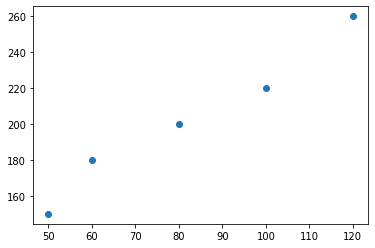

In [17]:
%matplotlib inline
plt.scatter(X['Powierzchnia'],y)

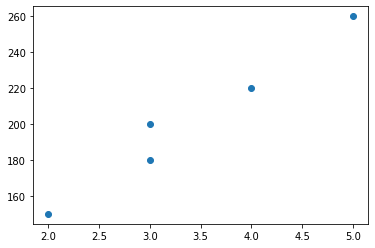

In [18]:
%matplotlib inline
plt.scatter(X['Liczba pokoi'],y)

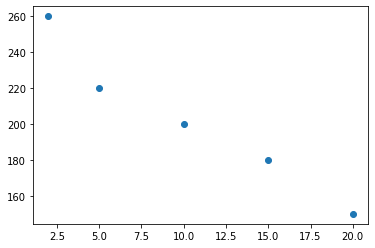

In [19]:
%matplotlib inline
plt.scatter(X['Wiek domu'],y)

In [20]:
# Tworzenie modelu regresji liniowej
model = LinearRegression()

In [21]:
# Dopasowanie modelu do danych
model.fit(X, y)

LinearRegression()

In [22]:
# Przewidywanie cen dla danych wejściowych
y_pred = model.predict(X)

In [23]:
# Współczynniki regresji
beta_0 = model.intercept_
beta_1_2_3 = model.coef_


In [24]:
# Obliczenie R² i MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

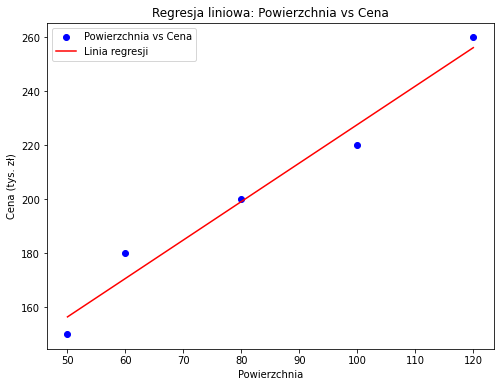

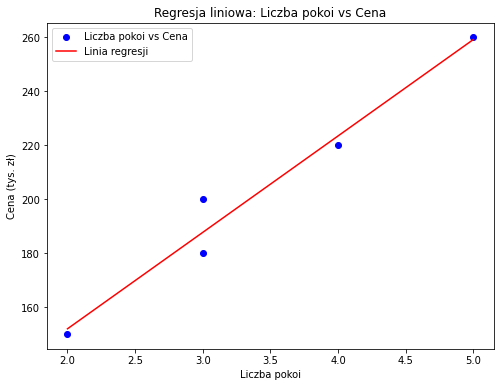

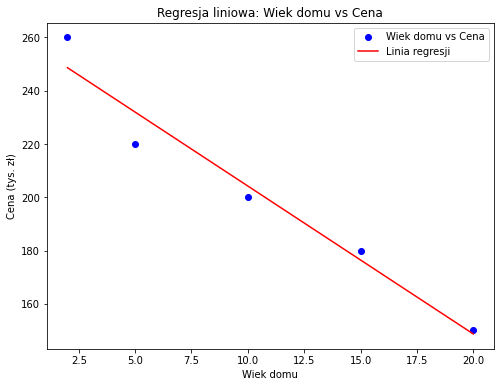

In [25]:
# Importowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dane przykładowe (powierzchnia w m², liczba pokoi, wiek domu, oraz cena w tys. zł)
data = {
    'Powierzchnia': [50, 60, 80, 100, 120],
    'Liczba pokoi': [2, 3, 3, 4, 5],
    'Wiek domu': [20, 15, 10, 5, 2],
    'Cena': [150, 180, 200, 220, 260]
}

# Tworzenie DataFrame
df = pd.DataFrame(data)

# Zmienna zależna (Cena)
y = df['Cena']

# Tworzenie modelu regresji liniowej
model = LinearRegression()

# Funkcja do tworzenia wykresów
def plot_regression_line(feature, feature_name):
    X = df[[feature_name]]
    
    # Dopasowanie modelu do jednej cechy
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Tworzenie wykresu
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label=f'{feature_name} vs Cena')
    plt.plot(X, y_pred, color='red', label='Linia regresji')
    plt.xlabel(feature_name)
    plt.ylabel('Cena (tys. zł)')
    plt.title(f'Regresja liniowa: {feature_name} vs Cena')
    plt.legend()
    plt.show()

# Wykres dla każdej cechy
plot_regression_line('Powierzchnia', 'Powierzchnia')
plot_regression_line('Liczba pokoi', 'Liczba pokoi')
plot_regression_line('Wiek domu', 'Wiek domu')

